In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier

In [3]:
#Reading data as pandas dataframe
frame = pd.read_csv('fake_or_real_news.csv')

#Inspecing Shape
frame.shape

#Inspecting top 5 rows
frame.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
#Setting the DataFrame index (row labels) using one or more existing columns
frame = frame.set_index("Unnamed: 0")
frame.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
y = frame.label
y.head()

Unnamed: 0
8476     FAKE
10294    FAKE
3608     REAL
10142    FAKE
875      REAL
Name: label, dtype: object

In [6]:
frame.drop("label", axis=1)
frame.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
X_train, X_test, y_train, y_test = train_test_split(frame['text'], y, test_size=0.33, random_state=53)

In [8]:
X_train.head()

Unnamed: 0
8055                                                     
5656    Report Copyright Violation Do you think there ...
669     The election in 232 photos, 43 numbers and 131...
5630    Email Ever wonder what’s on the mind of today’...
9797    Wells Fargo is Rotting from the Top Down Wells...
Name: text, dtype: object

In [9]:
y_train.head()

Unnamed: 0
8055    FAKE
5656    FAKE
669     REAL
5630    FAKE
9797    FAKE
Name: label, dtype: object

# Building Vectorizer Classifiers

## 1. By Using Count Vectorizer

In [10]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data.
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

## 2. By Using Tf-IDF Vectorizer

In [11]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [12]:
print(tfidf_test)

  (0, 56196)	0.043317993781946
  (0, 56091)	0.032700334892684514
  (0, 55858)	0.05420932672571138
  (0, 55358)	0.059873902121258926
  (0, 55027)	0.048465128413932454
  (0, 54772)	0.06742854646276102
  (0, 54647)	0.03727533728426692
  (0, 54484)	0.1271579409566499
  (0, 54400)	0.05200707680397371
  (0, 54182)	0.17039563890103226
  (0, 52193)	0.050614987002584974
  (0, 52166)	0.09946716362549408
  (0, 52164)	0.07141989873688631
  (0, 51896)	0.09946458588236584
  (0, 51083)	0.06988430196901438
  (0, 50973)	0.11421142130023298
  (0, 50920)	0.08108261495679815
  (0, 50712)	0.07153047197062776
  (0, 50690)	0.05024667107829908
  (0, 50627)	0.04286648720912277
  (0, 48965)	0.06202757667895662
  (0, 48929)	0.17556869825083593
  (0, 46631)	0.14220349264725846
  (0, 46621)	0.10706347107534141
  (0, 44522)	0.040932482324428275
  :	:
  (2090, 5969)	0.03303772830203347
  (2090, 5576)	0.04943418930560652
  (2090, 5530)	0.05752451982231977
  (2090, 4919)	0.026792001261175008
  (2090, 4321)	0.038896002

In [13]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [14]:
# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[0:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


# Values of Token Generated by Both The Vectorizers Are Same

In [15]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
difference = set(count_df.columns) - set(tfidf_df.columns)
difference
set()
print(count_df.equals(tfidf_df))
count_df.head()

False


,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Confusion Matrix

In [16]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Drawing Confusion Matrix With TfIdf Vectorizer

accuracy:   0.857
Confusion matrix, without normalization


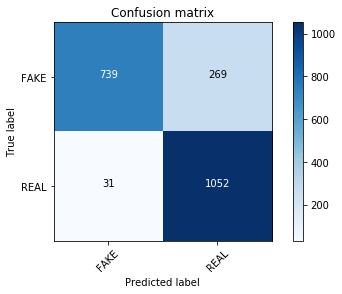

In [17]:
clf = MultinomialNB() 
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Drawing Confusion Matrix With Bag Of Words (Count Vectorizer)

accuracy:   0.893
Confusion matrix, without normalization


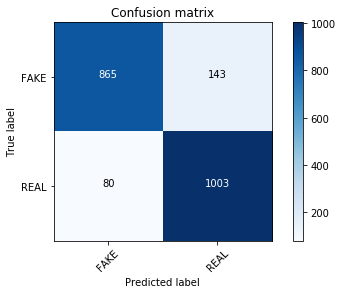

In [18]:
clf = MultinomialNB() 
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Drawing Confusion Matrix With Passive Agressive Classifier

accuracy:   0.936
Confusion matrix, without normalization


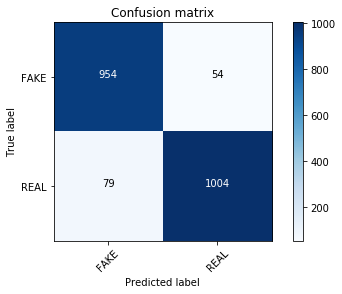

In [19]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [20]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)


FAKE -5.094252498796875 2016
FAKE -4.375850744790438 october
FAKE -4.050954727545882 hillary
FAKE -3.347141937477547 share
FAKE -2.8055081082281323 november
FAKE -2.8020766675819795 article
FAKE -2.6161349100215947 print
FAKE -2.3602558564761407 oct
FAKE -2.26454651287717 source
FAKE -2.238749440814916 email
FAKE -2.1967698745683677 war
FAKE -2.117922454422182 podesta
FAKE -2.11631388911236 election
FAKE -2.1124208222688954 advertisement
FAKE -2.0864223093557492 nov
FAKE -2.030886643603988 establishment
FAKE -2.0294689658558296 mosul
FAKE -1.9545961149818385 26
FAKE -1.9443897153599543 com
FAKE -1.8491627291375083 pipeline
FAKE -1.8182747335202452 wikileaks
FAKE -1.76757510996196 jewish
FAKE -1.7369065281391962 entire
FAKE -1.7312120723655582 brexit
FAKE -1.7237640325527441 ayotte
FAKE -1.6725711546069153 youtube
FAKE -1.6680825673534398 corporate
FAKE -1.661832302061657 donald
FAKE -1.6088226441572113 snip
FAKE -1.5977814108149933 dr

REAL 4.6922347564375 said
REAL 2.6607798190034946 

In [21]:
feature_names = tfidf_vectorizer.get_feature_names()
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-4.477148234163137, 'said'),
 (-4.5936919152219655, 'trump'),
 (-4.98170150128453, 'clinton'),
 (-5.455931002028523, 'people'),
 (-5.482207812723569, 'president'),
 (-5.511414074572205, 'obama'),
 (-5.515621480853161, 'state'),
 (-5.5727798946931095, 'new'),
 (-5.63452121120962, 'campaign'),
 (-5.728156816243612, 'republican'),
 (-5.844483857160232, 'party'),
 (-5.949002396420198, 'sanders'),
 (-5.964034477506528, 'states'),
 (-5.97418288622825, 'time'),
 (-5.986816295469049, 'just'),
 (-5.9903983888515535, 'like'),
 (-6.067024557833956, 'house'),
 (-6.115534950553315, 'political'),
 (-6.126896127062493, 'percent'),
 (-6.172241591175732, 'republicans')]

In [22]:
### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-13.817639290604365, '0000'),
 (-13.817639290604365, '000035'),
 (-13.817639290604365, '0001'),
 (-13.817639290604365, '0001pt'),
 (-13.817639290604365, '000km'),
 (-13.817639290604365, '0011'),
 (-13.817639290604365, '006s'),
 (-13.817639290604365, '007'),
 (-13.817639290604365, '007s'),
 (-13.817639290604365, '008s'),
 (-13.817639290604365, '0099'),
 (-13.817639290604365, '00am'),
 (-13.817639290604365, '00p'),
 (-13.817639290604365, '00pm'),
 (-13.817639290604365, '014'),
 (-13.817639290604365, '015'),
 (-13.817639290604365, '018'),
 (-13.817639290604365, '01am'),
 (-13.817639290604365, '020'),
 (-13.817639290604365, '023')]

In [23]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))
for i in tokens_with_weights:
    print(i)
    break

('00', -11.178581960989106)
